In [62]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [63]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
y_train.shape

(50000, 1)

In [64]:
# Convert data type to float32 for normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize by dividing each pixel by 255 (assuming pixel values are in the range [0, 255])
X_train /= 255.0
X_test /= 255.0
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)  # One-hot encode the labels
y_val = to_categorical(y_val, num_classes=10)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [41]:
y_test[9999]

array([7], dtype=uint8)

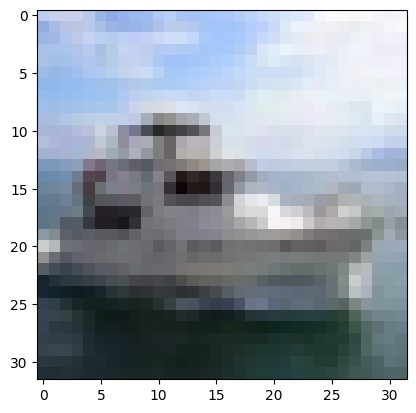

In [31]:
import matplotlib.pyplot as plt

# Select an image index (e.g., 0 for the first image)
image_index = 1

# Reshape the image to 32x32x3 (width, height, color channels)
image = X_train[39999].reshape(32, 32, 3)

plt.imshow(image)
plt.show()

In [ ]:
# Define the model
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
model = Sequential([
  Flatten(input_shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/50
313/313 [==============================] - 6s 16ms/step - loss: 2.0696 - accuracy: 0.2555 - val_loss: 1.9231 - val_accuracy: 0.3095
Epoch 2/50
313/313 [==============================] - 3s 11ms/step - loss: 1.8695 - accuracy: 0.3402 - val_loss: 1.8561 - val_accuracy: 0.3393
Epoch 3/50
313/313 [==============================] - 3s 11ms/step - loss: 1.7983 - accuracy: 0.3663 - val_loss: 1.7991 - val_accuracy: 0.3534
Epoch 4/50
313/313 [==============================] - 4s 14ms/step - loss: 1.7526 - accuracy: 0.3807 - val_loss: 1.7405 - val_accuracy: 0.3849
Epoch 5/50
313/313 [==============================] - 3s 10ms/step - loss: 1.7154 - accuracy: 0.3972 - val_loss: 1.7201 - val_accuracy: 0.3880
Epoch 6/50
313/313 [==============================] - 3s 11ms/step - loss: 1.6850 - accuracy: 0.4069 - val_loss: 1.6895 - val_accuracy: 0.4021
Epoch 7/50
313/313 [==============================] - 4s 11ms/step - loss: 1.6578 - accuracy: 0.4163 - val_loss: 1.6674 - val_accuracy: 0.4039

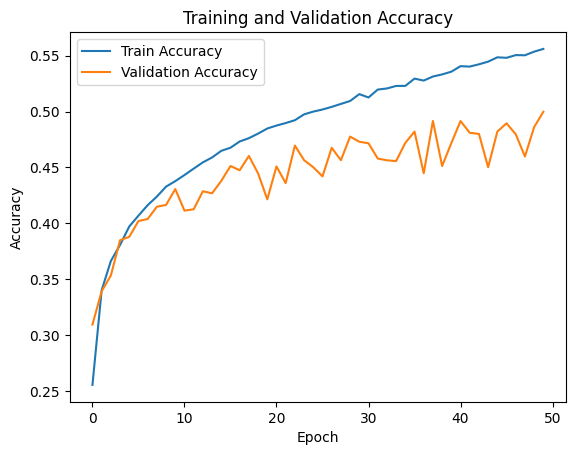

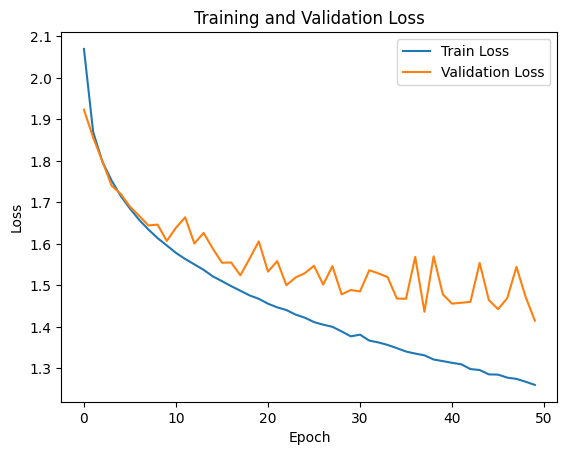

In [75]:
# Train the model using Mini-batch SGD
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val))

# Plot learning curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()